In [1]:
import pandas as pd
import os
from tqdm.notebook import tqdm


from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [2]:
mood_features= 'danceability valence energy'.split()

In [3]:
ranking_features_df= pd.read_csv(os.path.join('generated_data', 'ranking_features.csv'), index_col=0, parse_dates=['Date', 'release_date'])

In [4]:
ranking_features_df.head()

Position       Track Name                   Artist  Streams  \
0         1  Échame La Culpa  Luis Fonsi, Demi Lovato    26459   
1         2  Échame La Culpa  Luis Fonsi, Demi Lovato    24103   
2         3  Échame La Culpa  Luis Fonsi, Demi Lovato    24702   
3         3  Échame La Culpa  Luis Fonsi, Demi Lovato    24584   
4         3  Échame La Culpa  Luis Fonsi, Demi Lovato    25531   

                      URL       Date   Region                 song_id  \
0  1zsG4eaZmkA1dvjDDsAGLK 2018-01-01  Ecuador  1zsG4eaZmkA1dvjDDsAGLK   
1  1zsG4eaZmkA1dvjDDsAGLK 2018-01-02  Ecuador  1zsG4eaZmkA1dvjDDsAGLK   
2  1zsG4eaZmkA1dvjDDsAGLK 2018-01-03  Ecuador  1zsG4eaZmkA1dvjDDsAGLK   
3  1zsG4eaZmkA1dvjDDsAGLK 2018-01-04  Ecuador  1zsG4eaZmkA1dvjDDsAGLK   
4  1zsG4eaZmkA1dvjDDsAGLK 2018-01-05  Ecuador  1zsG4eaZmkA1dvjDDsAGLK   

  release_date  danceability  valence  energy                      id  
0   2017-11-17         0.724     0.64   0.895  1zsG4eaZmkA1dvjDDsAGLK  
1   2017-11-17         0.724     0.64   0.895  1zsG4eaZmkA1dvjDDsAGLK  
2   2017-11-17         0.724     0.64   0.895  1zsG4eaZmkA1dvjDDsAGLK  
3   2017-11-17         0.724     0.64   0.895  1zsG4eaZmkA1dvjDDsAGLK  
4   2017-11-17         0.724     0.64   0.895  1zsG4eaZmkA1dvjDDsAGLK

In [5]:
ranking_features_df['song_id'].nunique()

108349

In [6]:
continents = {}
continents['europe']=['Portugal', 'Italy', 'Germany', 'Finland', 'Estonia', 'Hungary', 
                      'Spain', 'Slovakia', 'Ireland', 'Iceland', 'France',  'Norway', 
                      'Lithuania', 'Turkey', 'Switzerland', 'Belgium', 'Denmark',  
                      'Poland', 'Austria', 'Sweden', 'CzechRepublic', 'Netherlands',
                      'UnitedKingdom',  'Latvia', 'Greece', 'Luxemborg']
continents['north_america']= 'USA Canada'.split()
continents['south_america']=['Ecuador', 'Panama', 'Peru',  'Uruguay', 'CostaRica',
                            'Mexico', 'Argentina', 'ElSalvador', 'Chile', 'Brazil', 
                            'Honduras', 'Guatemala','Bolivia', 'Columbia','DominicanRepublic', 'Paraguay']
continents['oceania']='Australia NewZealand'.split()
continents['asia']= ['Indonesia', 'Malaysia', 'Philippines', 'Taiwan', 'Japan', 'Singapore', 'HongKong']

### Plot all countries

In [7]:
def plot_all_countries_features_side_by_side(song_feat_df, feature):
    
    f, axes = plt.subplots(song_feat_df['Region'].nunique(), 1, figsize=(20,80), sharey='row', sharex='col')
    axe = axes.ravel()
    i=0
                                   
    for c in tqdm(song_feat_df['Region'].unique()):
        country_df = ranking_features_df[ranking_features_df['Region']==c]
        daily_country_df = country_df.drop(columns='Position Streams'.split()).groupby('Date').mean()                            
                          
        daily_country_df[feature].plot(ax=axe[i], label=f'{c}', grid=True, title=f'{c}');
        i+=1
    
    plt.grid(True)
    plt.tight_layout()
    plt.show()

  0%|          | 0/54 [00:00<?, ?it/s]

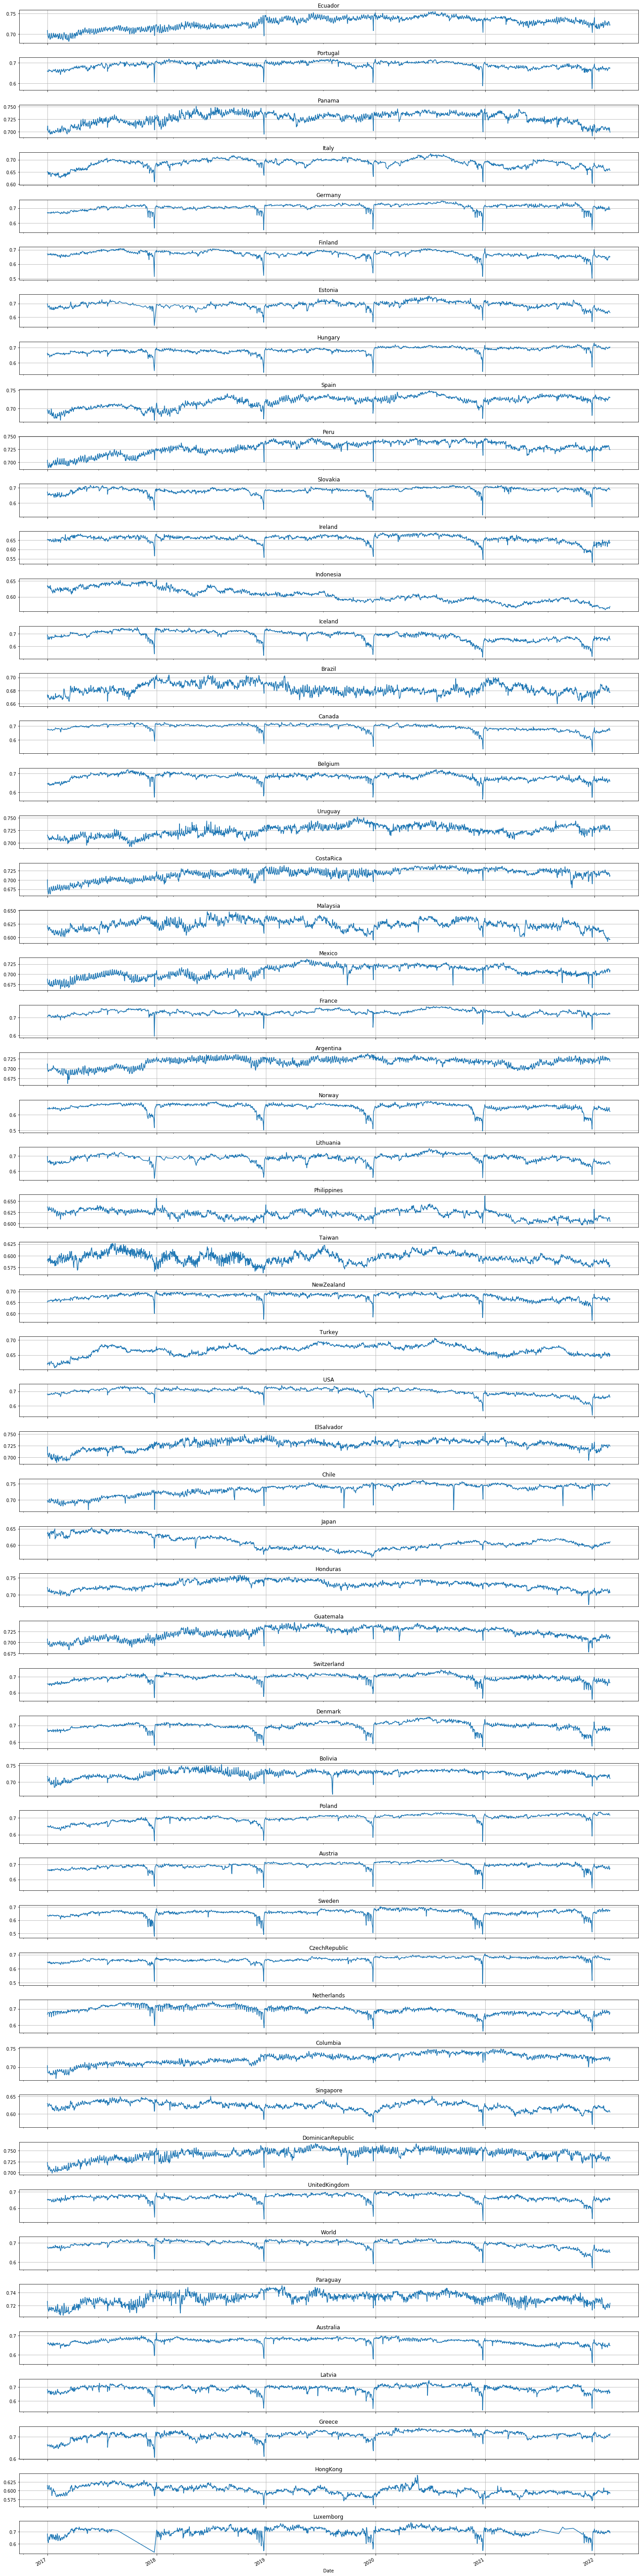

In [8]:
plot_all_countries_features_side_by_side(ranking_features_df, 'danceability')

In [9]:
def plot_all_countries_feature(song_feat_df, feature):
    
    ax= None
                                   
    for c in tqdm(song_feat_df['Region'].unique()):
        country_df = ranking_features_df[ranking_features_df['Region']==c]
        daily_country_df = country_df.drop(columns='Position Streams'.split()).groupby('Date').mean()                            
                          
        if ax:
            daily_country_df[feature].plot(ax=ax, label=f'{c}');
        else:
            ax= daily_country_df[feature].plot(grid=True, figsize=(12,4),label=f'{c}');
    
    plt.grid(True)
    plt.tight_layout()
    plt.show()

  0%|          | 0/54 [00:00<?, ?it/s]

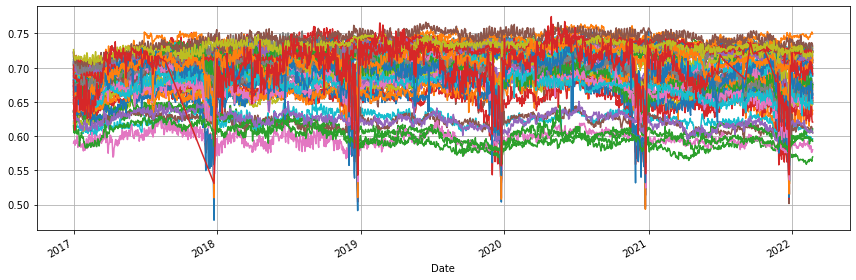

In [10]:
plot_all_countries_feature(ranking_features_df, 'danceability')

In [11]:
def generate_all_countries_dataframe(song_feat_df, feature):
    
    ax= None
    
    series= []
                                   
    for c in tqdm(song_feat_df['Region'].unique()):
        country_df = song_feat_df[song_feat_df['Region']==c]
        daily_country_df = country_df.drop(columns='Position Streams'.split()).groupby('Date').mean()
        daily_country_df = daily_country_df[feature].to_frame()
        daily_country_df.columns = [c]
                          
        series.append(daily_country_df)
    
    df= pd.concat(series, axis=1)
    df.columns = pd.MultiIndex.from_product([['country'],df.columns])

    return df

def plot_feature(df, f):
    plt.figure(figsize = (15,4))
    plt.grid(True)

    plt.grid(True)
    plt.xlabel("Time", fontsize = 24)
    plt.ylabel(f'{f}', fontsize = 24)
    plt.xticks(fontsize=24)
    plt.yticks(fontsize=16)
    ax= sns.lineplot(data=all_countries_df);
    #hide legend
    plt.legend([],[], frameon=False)

    plt.tight_layout()
    plt.savefig(os.path.join('figs',f'all_countries_{f}.png'))

In [12]:
all_countries_df = generate_all_countries_dataframe(ranking_features_df, 'danceability')

  0%|          | 0/54 [00:00<?, ?it/s]

In [13]:
all_countries_df.head()

country                                                    \
             Ecuador  Portugal    Panama     Italy   Germany   Finland   
Date                                                                     
2017-01-01  0.708640  0.659395  0.703766  0.650785  0.669025  0.671810   
2017-01-02  0.698765  0.661065  0.711824  0.648770  0.666900  0.669535   
2017-01-03  0.694330  0.657260  0.702710  0.649070  0.670630  0.662920   
2017-01-04  0.693865  0.656195  0.703038  0.643575  0.666025  0.666520   
2017-01-05  0.689700  0.658165  0.699731  0.639335  0.668305  0.667005   

                                                    ...            \
             Estonia   Hungary     Spain      Peru  ... Singapore   
Date                                                ...             
2017-01-01  0.698111  0.662727  0.697130  0.704060  ...  0.629645   
2017-01-02  0.682613  0.649667  0.692590  0.694455  ...  0.626855   
2017-01-03  0.675297  0.657717  0.691185  0.694195  ...  0.620855   
2017-01-04  0.672182  0.654398  0.686745  0.689395  ...  0.620920   
2017-01-05  0.676121  0.652504  0.689810  0.689705  ...  0.624600   

                                                                          \
           DominicanRepublic UnitedKingdom     World  Paraguay Australia   
Date                                                                       
2017-01-01          0.723262      0.653545  0.678385  0.726412  0.660795   
2017-01-02          0.714189      0.648800  0.674160  0.718631  0.656275   
2017-01-03          0.716740      0.651695  0.673025  0.714081  0.657965   
2017-01-04          0.713333      0.653690  0.671995  0.713788  0.660385   
2017-01-05          0.706835      0.649650  0.671440  0.710694  0.662680   

                                                    
              Latvia    Greece  HongKong Luxemborg  
Date                                                
2017-01-01  0.682056  0.665026  0.615340  0.681000  
2017-01-02  0.674976  0.657717  0.605175  0.625667  
2017-01-03  0.655021  0.657654  0.607400  0.626857  
2017-01-04  0.665220  0.661333  0.603985  0.608833  
2017-01-05  0.671811  0.661245  0.609725  0.626857  

[5 rows x 54 columns]

In [14]:
all_countries_df.describe()

country                                                      \
           Ecuador     Portugal       Panama        Italy      Germany   
count  1876.000000  1876.000000  1876.000000  1875.000000  1876.000000   
mean      0.726877     0.690371     0.727059     0.686428     0.706825   
std       0.014239     0.015074     0.011000     0.018375     0.020241   
min       0.681990     0.573570     0.691675     0.602345     0.549805   
25%       0.716800     0.680938     0.721156     0.677153     0.700299   
50%       0.729645     0.693017     0.729562     0.689970     0.710513   
75%       0.738189     0.701655     0.735631     0.698550     0.719456   
max       0.754730     0.718950     0.750649     0.724875     0.746075   

                                                                        ...  \
           Finland      Estonia      Hungary        Spain         Peru  ...   
count  1876.000000  1629.000000  1876.000000  1875.000000  1876.000000  ...   
mean      0.671468     0.690796     0.683103     0.718719     0.727982  ...   
std       0.021123     0.024585     0.019671     0.014908     0.012281  ...   
min       0.501430     0.536588     0.531970     0.668595     0.689395  ...   
25%       0.660976     0.678024     0.673643     0.708385     0.722099  ...   
50%       0.672127     0.692969     0.683630     0.722845     0.729700  ...   
75%       0.685950     0.706576     0.697532     0.729695     0.738216  ...   
max       0.709365     0.757067     0.728855     0.748585     0.747215  ...   

                                                                              \
         Singapore DominicanRepublic UnitedKingdom        World     Paraguay   
count  1875.000000       1876.000000   1876.000000  1873.000000  1876.000000   
mean      0.622801          0.741840      0.667074     0.694512     0.731075   
std       0.010998          0.011915      0.019008     0.018509     0.008012   
min       0.564760          0.698594      0.524200     0.569040     0.704310   
25%       0.616173          0.736180      0.658366     0.685430     0.726399   
50%       0.622950          0.743807      0.670162     0.700755     0.732100   
75%       0.631023          0.750323      0.679868     0.707050     0.736528   
max       0.650860          0.766510      0.705105     0.723725     0.750960   

                                                                        
         Australia       Latvia       Greece     HongKong    Luxemborg  
count  1876.000000  1839.000000  1876.000000  1875.000000  1575.000000  
mean      0.671531     0.690942     0.708440     0.601361     0.703143  
std       0.015299     0.022264     0.017765     0.011493     0.030883  
min       0.557310     0.532010     0.604921     0.558895     0.530869  
25%       0.662676     0.680068     0.701305     0.593332     0.687747  
50%       0.674868     0.695712     0.710598     0.600420     0.708625  
75%       0.682366     0.705218     0.720363     0.609280     0.723654  
max       0.713820     0.749246     0.742500     0.645000     0.774727  

[8 rows x 54 columns]

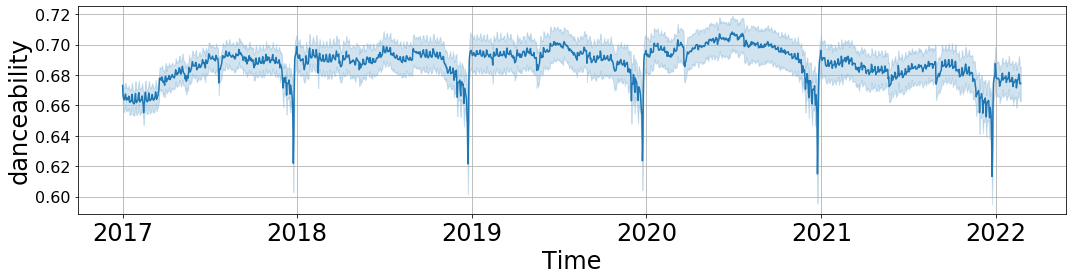

In [15]:
plot_feature(all_countries_df, 'danceability')

  0%|          | 0/54 [00:00<?, ?it/s]

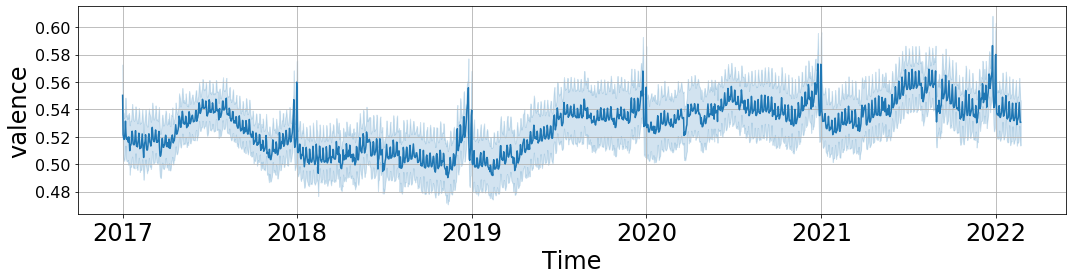

In [16]:
all_countries_df = generate_all_countries_dataframe(ranking_features_df, 'valence')
plot_feature(all_countries_df, 'valence')

  0%|          | 0/54 [00:00<?, ?it/s]

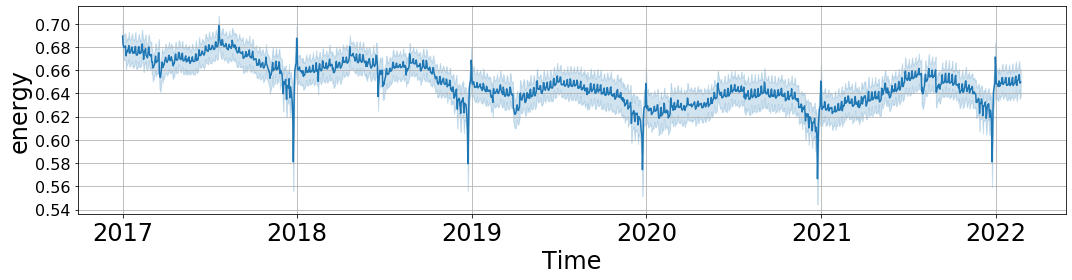

In [17]:
all_countries_df = generate_all_countries_dataframe(ranking_features_df, 'energy')
plot_feature(all_countries_df, 'energy')

### Plot decomposition of the mood features' series

In [50]:
def plot_decompose_series(df, feature, resample, country_lst=None):
    if country_lst:
        country_df = df[df['Region'].isin(country_lst)]
    else:
        country_df= df
    daily_country_df = country_df.drop(columns='Position Streams'.split()).groupby('Date').mean()
    
    ts =daily_country_df[feature]
    if resample:
        ts= ts.resample(resample[0]).mean()
    
    result_water = seasonal_decompose(ts, model='additive', period=resample[1]);

    fig, (ax1,ax2,ax3) = plt.subplots(3,1, figsize=(15,8))
    result_water.trend.plot(ax=ax1, grid=True, title='Trend')
    result_water.resid.plot(ax=ax2, grid=True, title='Residuals')
    result_water.seasonal.plot(ax=ax3, grid=True, title='Seasonal');
    ax3.set_xlabel('Time')
    plt.tight_layout()

    if country_lst== None:
        country_lst=['global']
    plt.savefig(os.path.join('figs', 'decompose_{}_{}_{}'.format(feature, resample[0],'_'.join(country_lst))))
    
def decompose_series_dist(df, feature, resample):
    
    decompose_values = []
    for c in tqdm(df['Region'].unique()):
        for feature in 'danceability valence energy'.split():

            country_df = df[df['Region']== c]

            daily_country_df = country_df.drop(columns='Position Streams'.split()).groupby('Date').mean()

            ts =daily_country_df[feature]
            if resample:
                ts= ts.resample(resample[0]).mean()

            ts = ts.fillna(method='ffill')
            ts_decomp = seasonal_decompose(ts, model='additive', period=resample[1]);

            decompose_values.append((c, feature, 'trend', ts_decomp.trend.mean()))
            decompose_values.append((c, feature, 'residual', ts_decomp.resid.mean()))
            decompose_values.append((c, feature, 'seasonal', ts_decomp.seasonal.mean()))
        
    df_decomp = pd.DataFrame.from_records(decompose_values, columns='country feature component value'.split())
    
    return df_decomp

In [19]:
resamples = {'by_week': ['W-MON',4],
             'by_month': ['M',12]}

## Distribution of decomposition values

In [20]:
all_countries_decomp_df= decompose_series_dist(ranking_features_df, 'danceability', resamples['by_week'])

  0%|          | 0/54 [00:00<?, ?it/s]

In [21]:
all_countries_decomp_df.head()

country       feature component         value
0  Ecuador  danceability     trend  7.270022e-01
1  Ecuador  danceability  residual -8.441371e-06
2  Ecuador  danceability  seasonal -2.443887e-07
3  Ecuador       valence     trend  6.250100e-01
4  Ecuador       valence  residual  3.990615e-06

In [22]:
all_countries_decomp_df.describe()

value
count  486.000000
mean     0.207051
std      0.297147
min     -0.000053
25%     -0.000002
50%      0.000002
75%      0.564761
max      0.742013

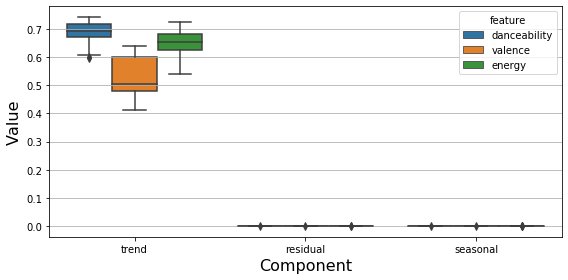

In [23]:
import seaborn as sns

plt.figure(figsize=(8,4))
plt.grid(True)
sns.boxplot(x='component', y="value", hue="feature", data=all_countries_decomp_df);
plt.xlabel('Component', fontsize=16)
plt.ylabel('Value', fontsize=16)

plt.tight_layout()
plt.savefig(os.path.join('figs', 'decomposition_dist.png'))

## By continents

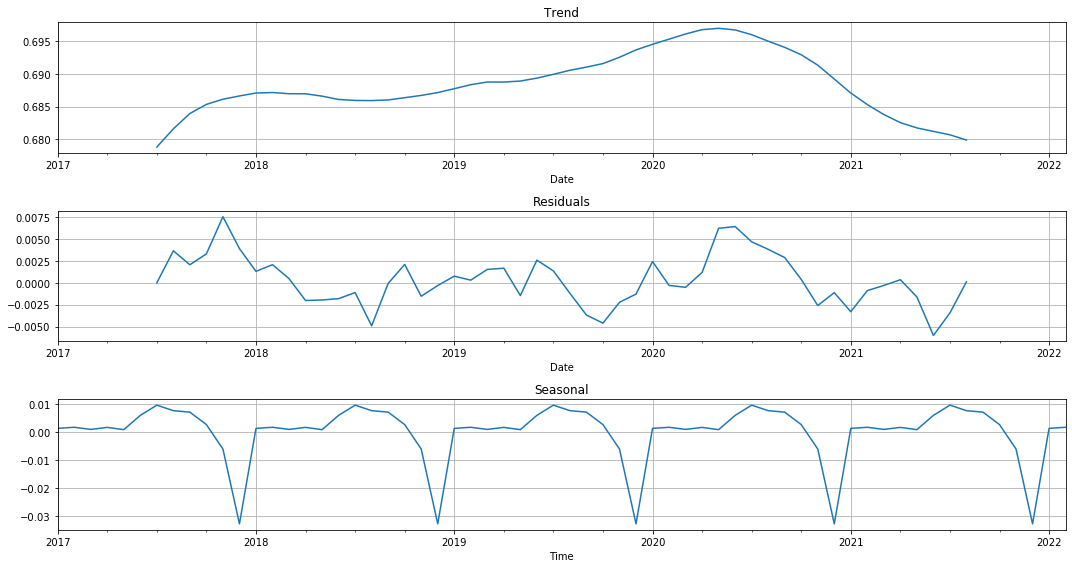

In [24]:
plot_decompose_series(ranking_features_df, 'danceability',resamples['by_month'], continents['europe'])

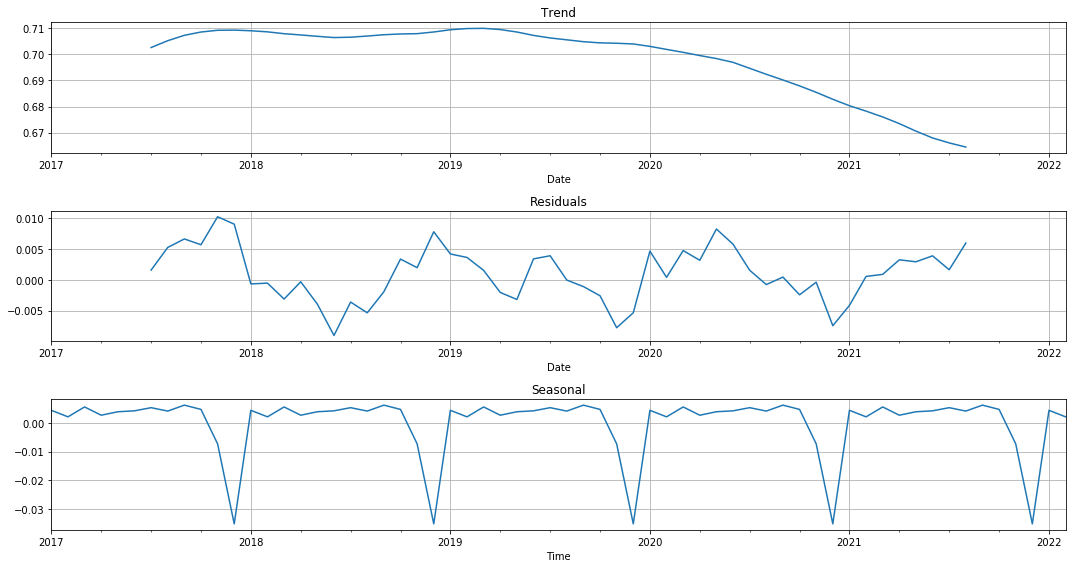

In [25]:
plot_decompose_series(ranking_features_df, 'danceability',resamples['by_month'], continents['north_america'])

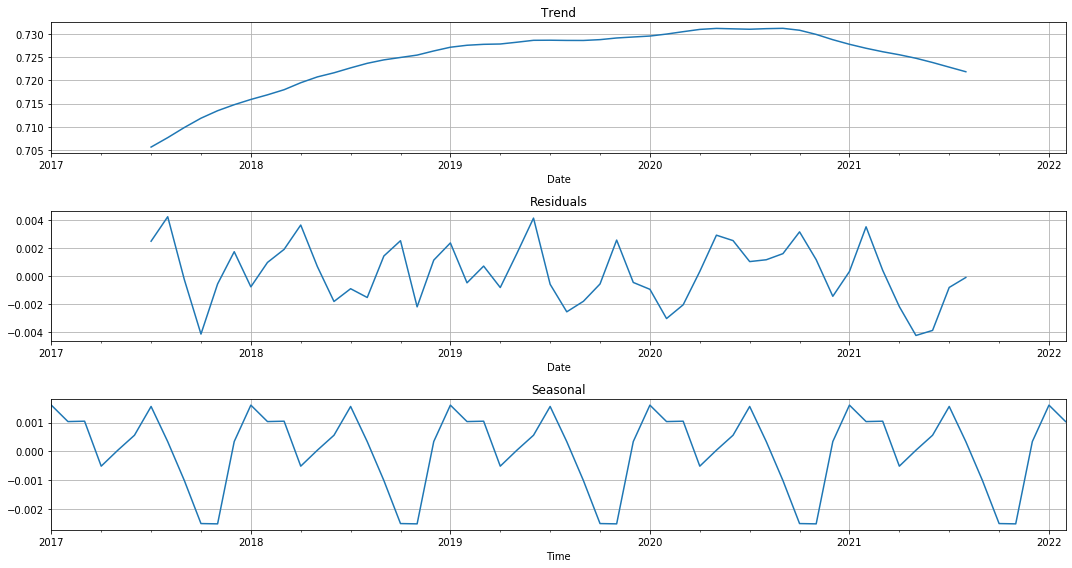

In [26]:
plot_decompose_series(ranking_features_df, 'danceability',resamples['by_month'], continents['south_america'])

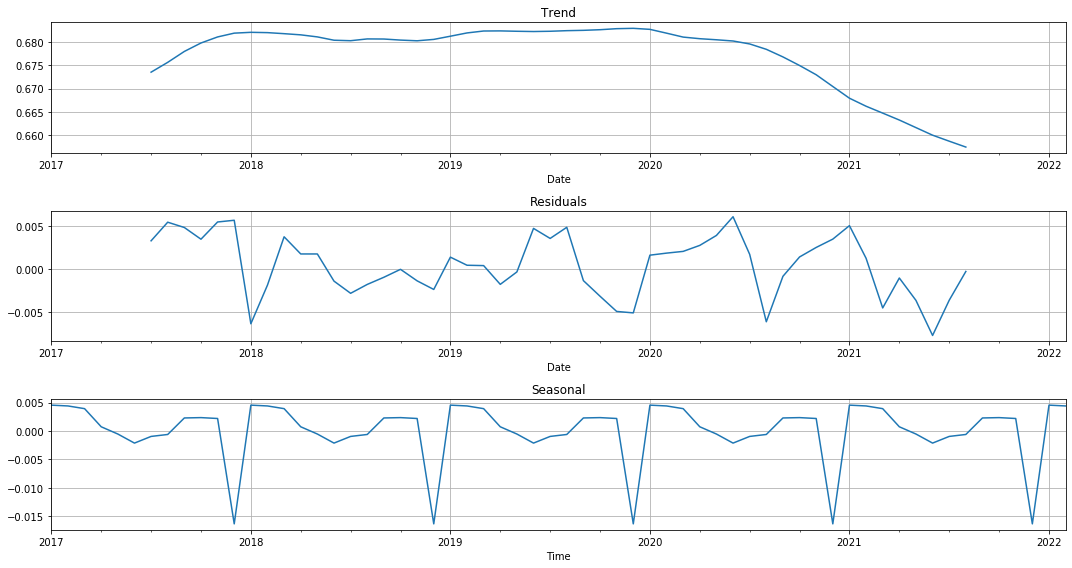

In [27]:
plot_decompose_series(ranking_features_df, 'danceability',resamples['by_month'], continents['oceania'])

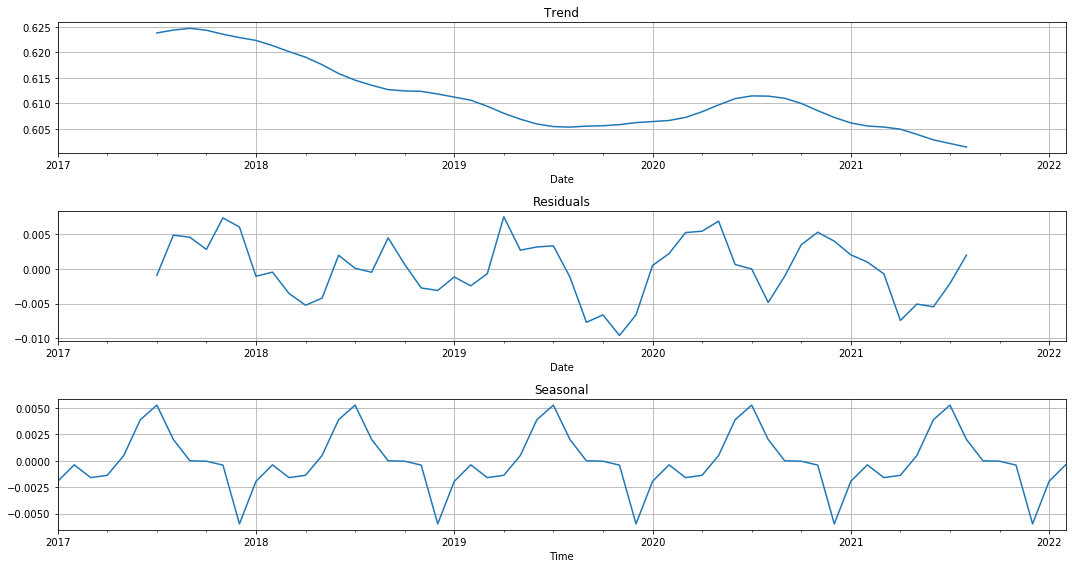

In [28]:
plot_decompose_series(ranking_features_df, 'danceability',resamples['by_month'], continents['asia'])

### Spain

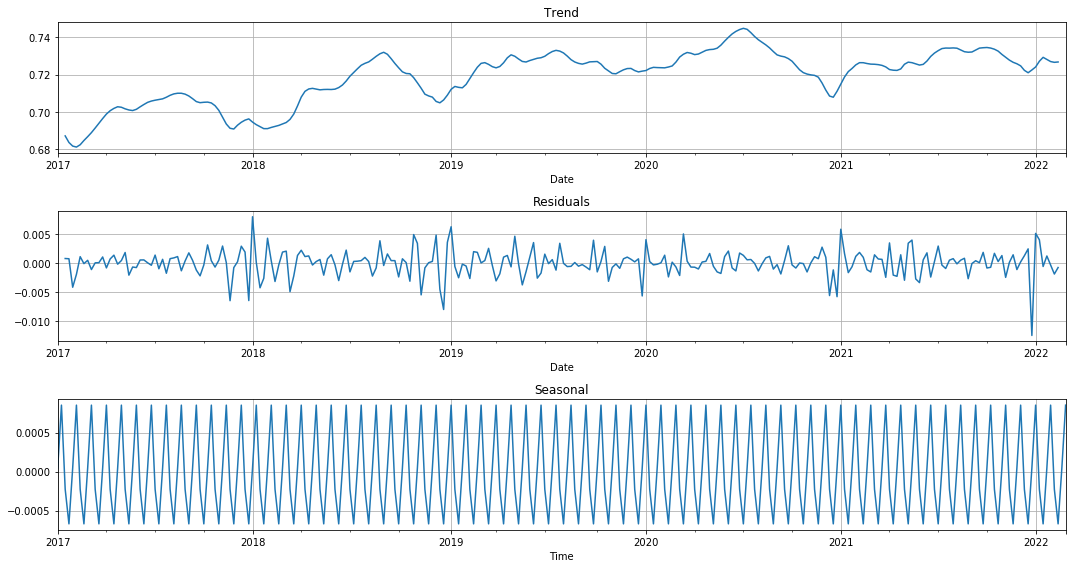

In [29]:
plot_decompose_series(ranking_features_df, 'danceability',resamples['by_week'], ['Spain'])

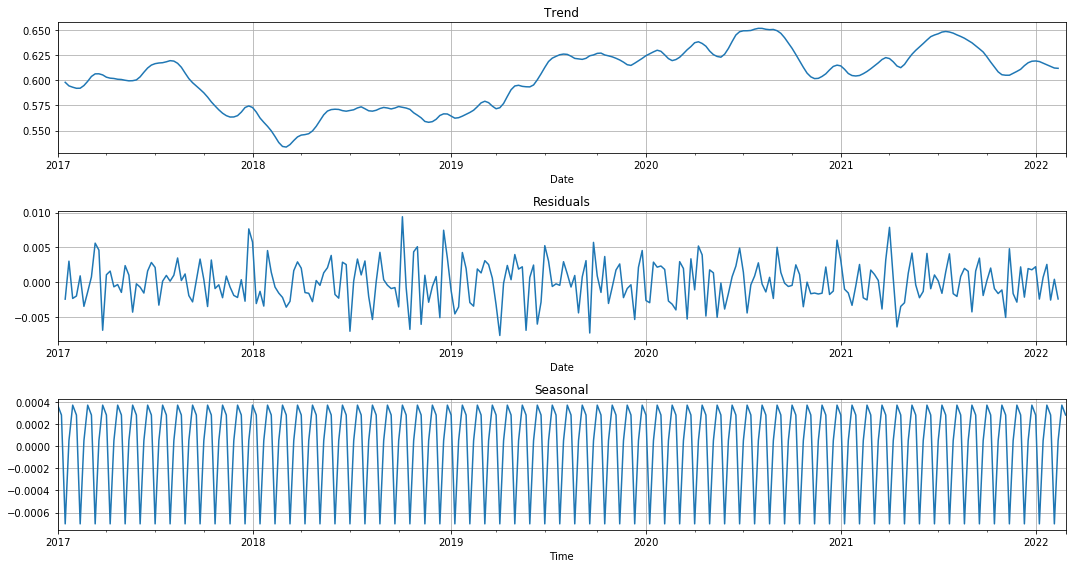

In [30]:
plot_decompose_series(ranking_features_df, 'valence',resamples['by_week'], ['Spain'])

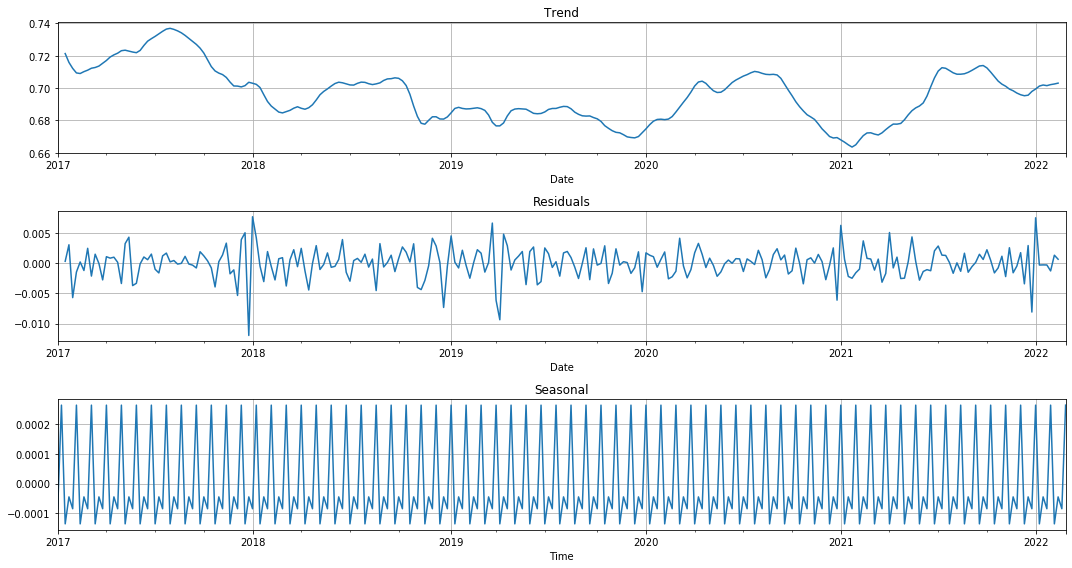

In [31]:
plot_decompose_series(ranking_features_df, 'energy',resamples['by_week'], ['Spain'])

### Italy

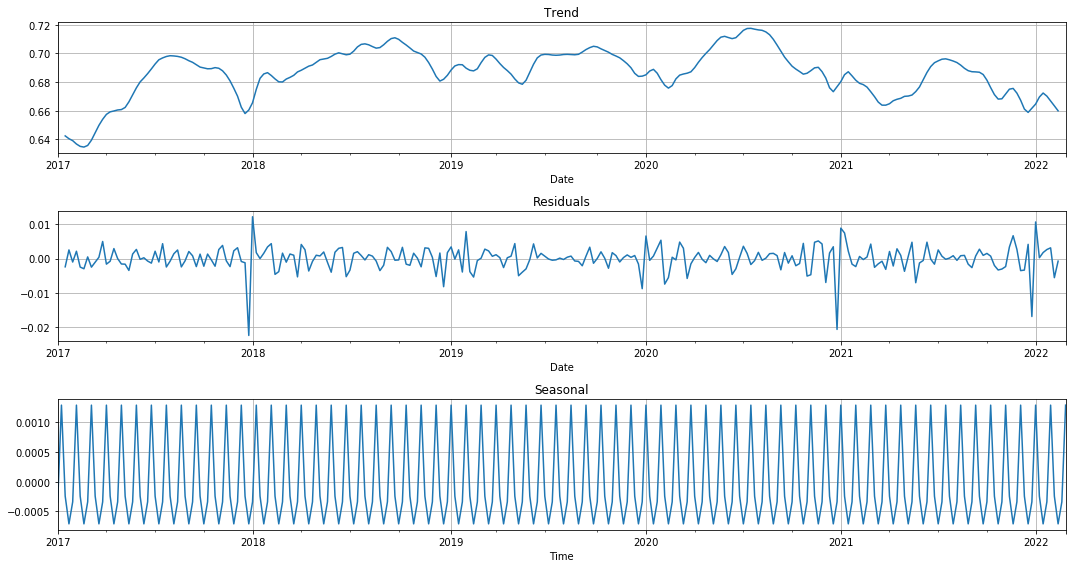

In [32]:
plot_decompose_series(ranking_features_df, 'danceability',resamples['by_week'], ['Italy'])

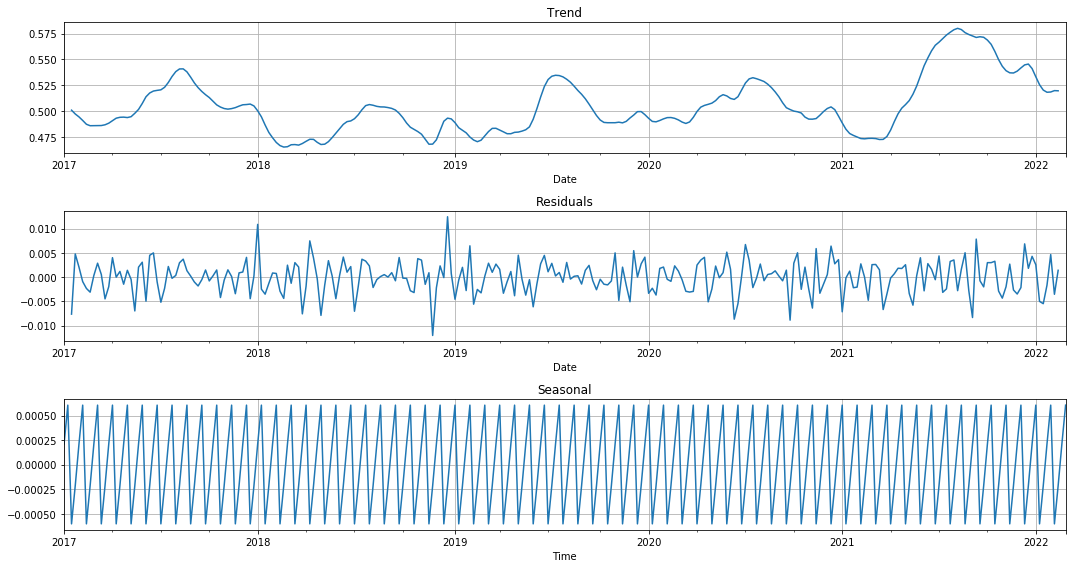

In [33]:
plot_decompose_series(ranking_features_df, 'valence',resamples['by_week'], ['Italy'])

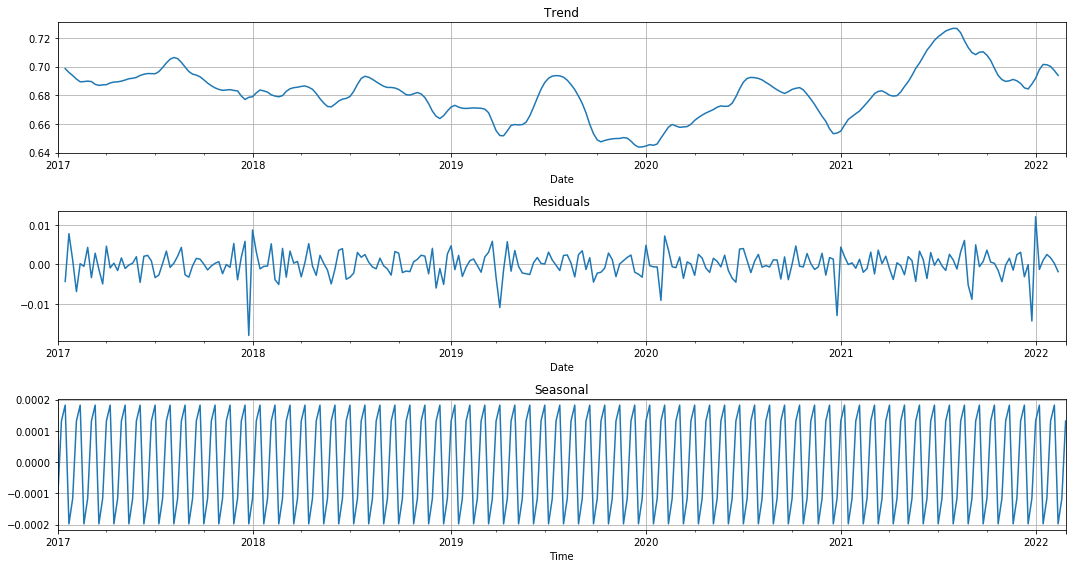

In [34]:
plot_decompose_series(ranking_features_df, 'energy',resamples['by_week'], ['Italy'])

### France

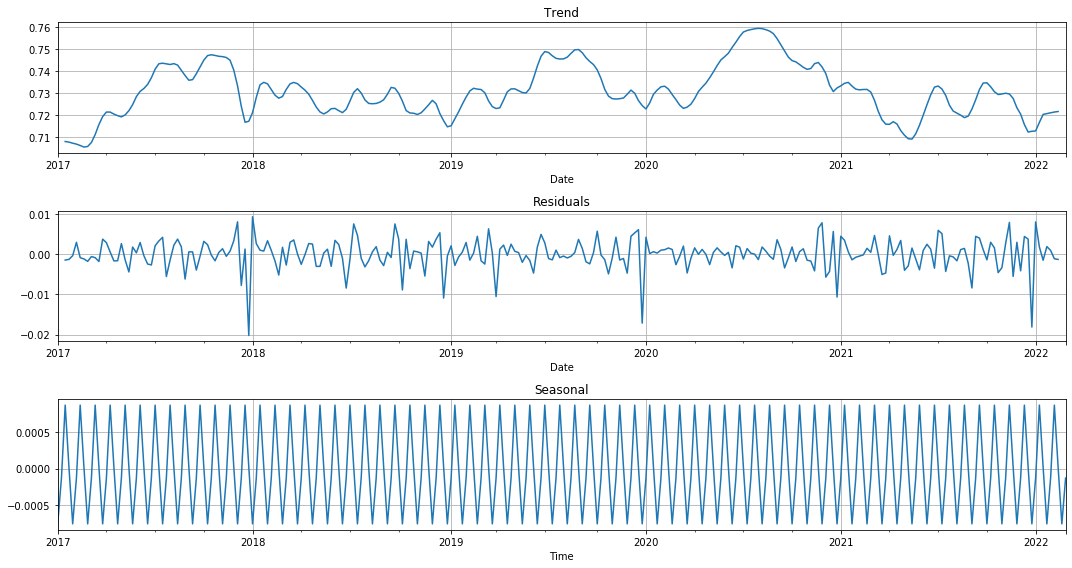

In [36]:
plot_decompose_series(ranking_features_df, 'danceability',resamples['by_week'], ['France'])

### United Kingdom

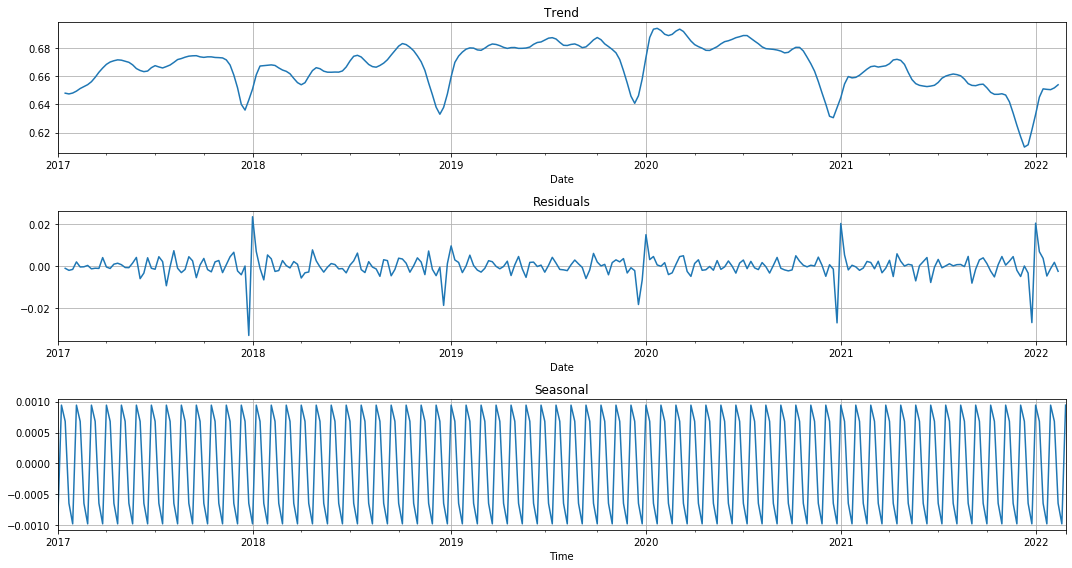

In [37]:
plot_decompose_series(ranking_features_df, 'danceability',resamples['by_week'], ['UnitedKingdom'])

### Global plot

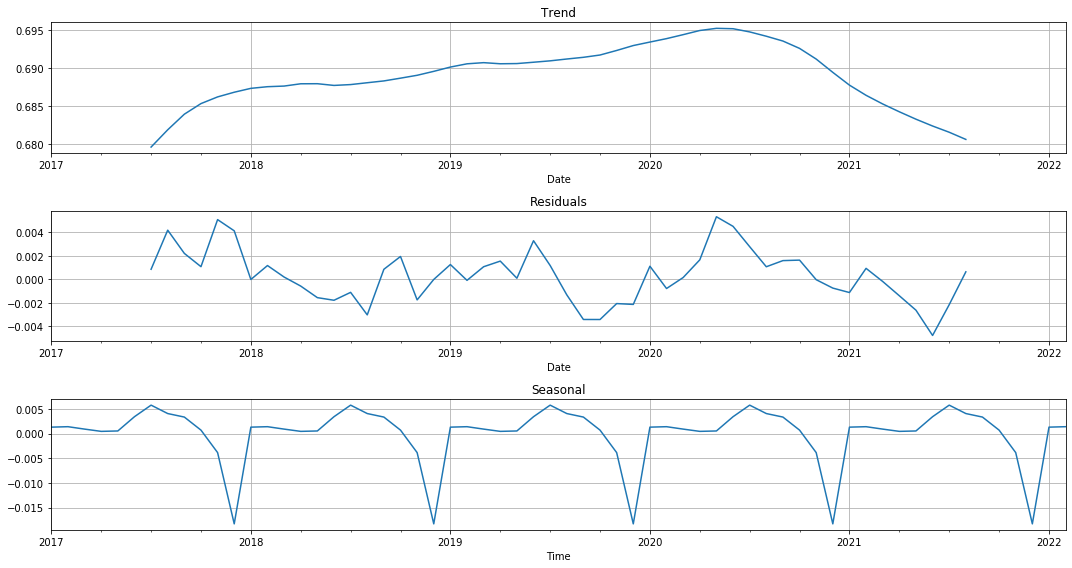

In [51]:
plot_decompose_series(ranking_features_df, 'danceability',resamples['by_month'])

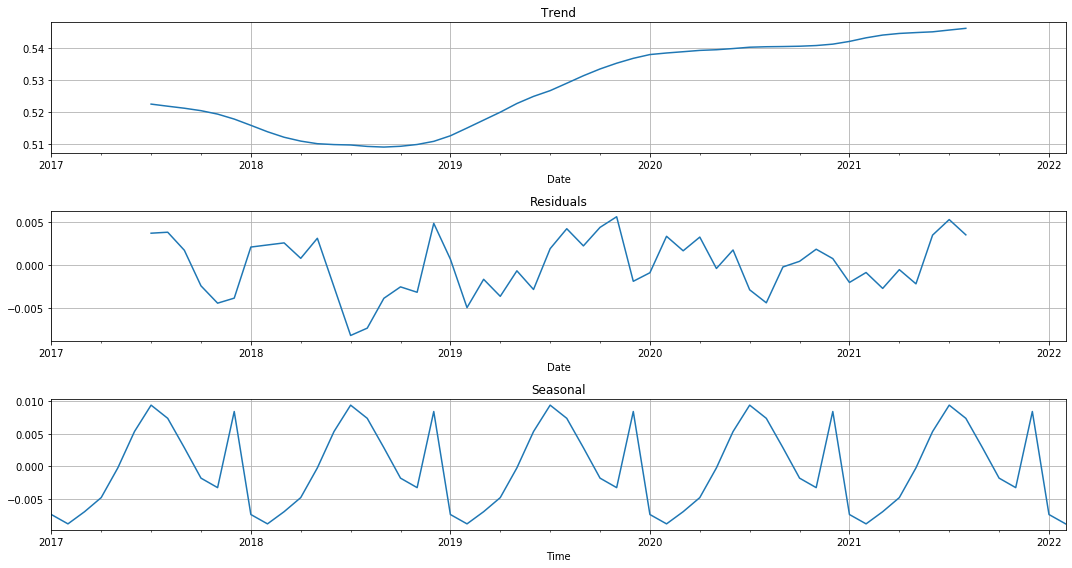

In [52]:
plot_decompose_series(ranking_features_df, 'valence',resamples['by_month'])

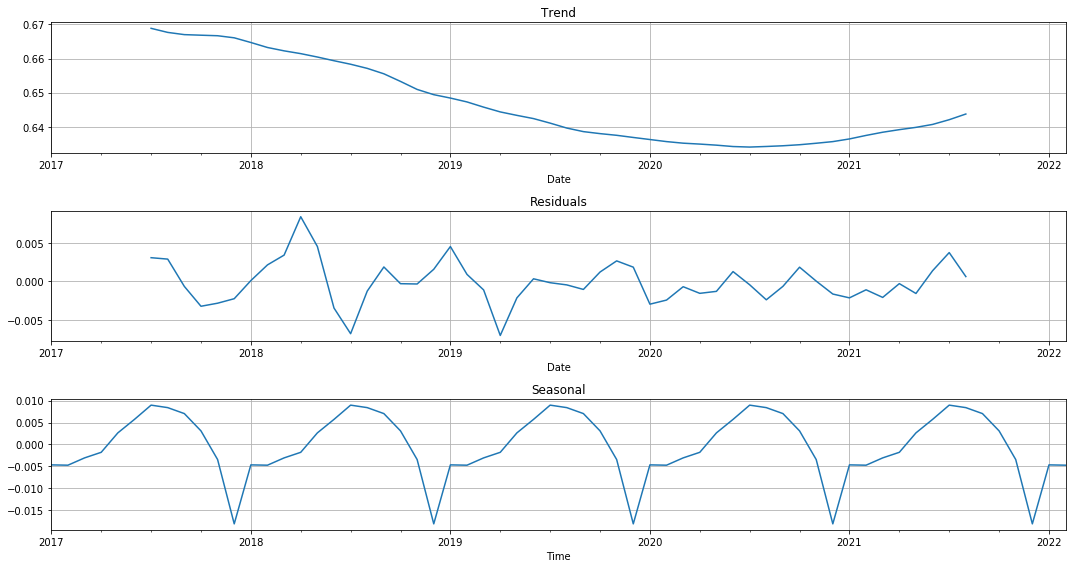

In [53]:
plot_decompose_series(ranking_features_df, 'energy',resamples['by_month'])

## Extraction and storage of the trend component 

In [42]:
def decompose_storage_series(df, features, resample):
    trends= {}
    for f in tqdm(features, desc='features'):
        f_trends= []
        for c in tqdm(df['Region'].unique(), desc='countries', leave=False):
            country_df = df[df['Region']==c]

            daily_country_df = country_df.drop(columns='Position Streams'.split()).groupby('Date').mean()

            ts =daily_country_df[f]
            if resample:
                ts= ts.resample(resample[0]).mean()

            #print(f,c,ts.isna().sum())
            
            if ts.isna().sum() == 0:
                ts_decomposition = seasonal_decompose(ts, model='additive', period=resample[1]);
                trend_= ts_decomposition.trend.dropna().to_frame().T
                trend_.insert(0,'Country',[c])

                f_trends.append(trend_)
        
        f_trends_df= pd.concat(f_trends,axis=0)
        f_trends

In [43]:
def decompose_storage_series(df, features, resample):
    trends= {}
    for f in tqdm(features, desc='features'):
        f_trends= []
        for c in tqdm(df['Region'].unique(), desc='countries', leave=False):
            country_df = df[df['Region']==c]

            daily_country_df = country_df.drop(columns='Position Streams'.split()).groupby('Date').mean()

            ts =daily_country_df[f]
            if resample:
                ts= ts.resample(resample[0]).mean()

            #print(f,c,ts.isna().sum())
            
            if ts.isna().sum() == 0:
                ts_decomposition = seasonal_decompose(ts, model='additive', period=resample[1]);
                trend_= ts_decomposition.trend.dropna().to_frame().T
                trend_.insert(0,'Country',[c])

                f_trends.append(trend_)
        
        f_trends_df= pd.concat(f_trends,axis=0)
        f_trends_df = f_trends_df.set_index('Country')
        trends[f]= f_trends_df
    
    return trends

all_trends= decompose_storage_series(ranking_features_df, mood_features, resamples['by_month'])

features:   0%|          | 0/3 [00:00<?, ?it/s]

countries:   0%|          | 0/54 [00:00<?, ?it/s]

countries:   0%|          | 0/54 [00:00<?, ?it/s]

countries:   0%|          | 0/54 [00:00<?, ?it/s]

In [44]:
all_trends['danceability'].head()

Date      2017-07-31  2017-08-31  2017-09-30  2017-10-31  2017-11-30  \
Country                                                                
Ecuador     0.706502    0.707972    0.709835    0.711687    0.713041   
Portugal    0.683005    0.686684    0.690259    0.692575    0.694052   
Panama      0.715839    0.717521    0.719486    0.721418    0.723290   
Italy       0.673223    0.676909    0.680311    0.683141    0.685636   
Germany     0.692505    0.695573    0.698331    0.700104    0.701102   

Date      2017-12-31  2018-01-31  2018-02-28  2018-03-31  2018-04-30  ...  \
Country                                                               ...   
Ecuador     0.714020    0.714759    0.715233    0.715754    0.716730  ...   
Portugal    0.695232    0.696505    0.697805    0.698400    0.698766  ...   
Panama      0.724675    0.725838    0.727020    0.728322    0.730068  ...   
Italy       0.687384    0.688304    0.688882    0.689907    0.691337  ...   
Germany     0.701902    0.702260    0.702146    0.701989    0.701566  ...   

Date      2020-11-30  2020-12-31  2021-01-31  2021-02-28  2021-03-31  \
Country                                                                
Ecuador     0.739279    0.737804    0.736174    0.734729    0.733826   
Portugal    0.690922    0.688478    0.685971    0.683925    0.682174   
Panama      0.734960    0.734051    0.732791    0.731714    0.730616   
Italy       0.690041    0.687578    0.685801    0.683904    0.682396   
Germany     0.716347    0.715334    0.713877    0.712019    0.710318   

Date      2021-04-30  2021-05-31  2021-06-30  2021-07-31  2021-08-31  
Country                                                               
Ecuador     0.733178    0.732540    0.731840    0.730794    0.729542  
Portugal    0.680816    0.679803    0.678697    0.677492    0.676409  
Panama      0.729406    0.727968    0.725888    0.723576    0.721203  
Italy       0.681213    0.679929    0.678741    0.677555    0.676129  
Germany     0.709861    0.710285    0.710396    0.709914    0.708581  

[5 rows x 50 columns]

In [45]:
for f, df in all_trends.items():
    df.to_csv(os.path.join('generated_data', f'all_trends_{f}.csv'), header=False)

In [46]:
print("That's all folks!")

That's all folks!
